<div align='center' ><img src='https://raw.github.com/davidrpugh/computational-econ-labs/master/graduate/images/sgpe-logo.jpg' width=\"1200\" height=\"100\"></div>
<div align='center' ><img src='https://raw.github.com/davidrpugh/computational-econ-labs/master/graduate/images/sirelogo.jpg' width=\"1200\" height=\"100\"></div>

# *Numerical Methods for Economists: RBC modelling*

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from scipy import linalg, interpolate, io

# Task 1: How well do you know your single period utility function? RBC edition!

This task will help you build some intuition for the intra-period trade-off between consumption and leisure that is the economic mechanism which propogates total factor productivity shocks in all basic real business cycle (RBC) models.  In this lab we will assume that the representative household has the following flow utility function: 

$$ u\bigg(C_t, L_t\bigg) = \left(\frac{C_t^{1 - \theta} - 1}{1 - \theta}\right) + b \left(\frac{(1 - L_t)^{1 - \omega} - 1}{1 - \omega}\right) $$

where $C_{t}$, $L_{t}$ is labor (note that labor endowment has been normalized to 1!). The parameter $0 < \theta$ is the coefficient of relative risk avesion, $0 < \omega$ is the inverse inter-temporal elasticity of substitution between current and future leisure, and $0 < b$ controls the importance of leisure in determining flow utility. Note that if $\theta = \omega = 1$, then 

$$u\bigg(C_t, L_t\bigg) = \ln C_t + b \ln (1 - L_t) $$

and we recover the flow utility function assumed by Romer and used in your lecture notes. Code this utility function in the cell below.

In [5]:
def u(C, L):
    """ 
    In the standard RBC model utility in each period is a function of 
    consumption, C, and leisure, 1 - L. Note that the representative
    household's labor endowment has been normalized to 1 for simplicity. 
    
    Arguments:
    
        C:      (array) Consumption
        L:      (array) Labor supply
    
    Returns:
    
        utility: (array) Flow utility of the representative agent.
        
    """
    if theta == 1.0:
        utility_consumption = np.log(C)
    else:
        utility_consumption = (C**(1 - theta) - 1) / (1 - theta)
        
    if omega == 1.0:
        utility_leisure = np.log(1 - L)
    else:
        utility_leisure = ((1 - L)**(1 - omega) - 1) / (1 - omega)
        
    # flow utility is weighted sum of utilities from consumption and leisure
    utility = utility_consumption + b * utility_leisure
    
    return utility

In [6]:
# Choose some parameter values
b, theta, omega = 2.0, 1.0, 1.0

# Check that the utility function is working properly!
u(np.exp(1), 0)

1.0

### Exercise:

First, let's plot the utility surface using matplotlib 3D graphics functions for $b=2.5, \theta=1.0, \omega=1.0$. What to you notice about the shape of the utility surface? Rotate the plot by altering the `azim` argument of the `fig.gca()` function.  What do you notice about the marginal utilities of consumption and leisure?  Finally, change the parameters $b,\theta,\omega$. Try to anticipate how parameter changes will alter the utility surface. Do the actual changes confirm your expectations? Or not?

d:\Anaconda2\lib\site-packages\ipykernel\__main__.py:18: RuntimeWarning: divide by zero encountered in log
d:\Anaconda2\lib\site-packages\ipykernel\__main__.py:23: RuntimeWarning: divide by zero encountered in log
d:\Anaconda2\lib\site-packages\mpl_toolkits\mplot3d\proj3d.py:160: RuntimeWarning: invalid value encountered in true_divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


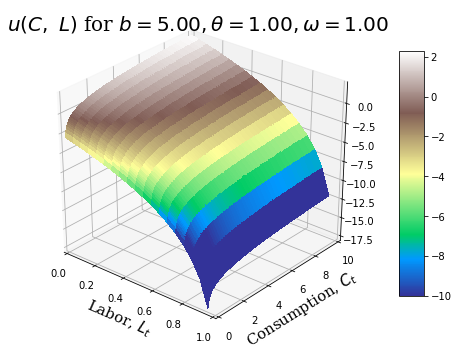

In [7]:
# create a new Figure object 
fig = plt.figure(figsize=(8,6))

# create a 3D Axes object
ax = fig.gca(projection='3d', elev=30, azim=310)

# create a grid of (x,y) values which we will pass to function
consumption = np.linspace(0, 10, 200)
labor = np.linspace(0, 1, 20)
L, C = np.meshgrid(labor, consumption)

# Choose parameter values
b, theta, omega = 5.0, 1.0, 1.0

# we will actually plot output
utility = u(C, L)

# note the use of the new plot command!
utility_surface = ax.plot_surface(L, C, utility, rstride=1, cstride=1, cmap=mpl.cm.terrain, 
                                  linewidth=0, vmin=-10, vmax=np.max(utility), 
                                  antialiased=False)

# axes, labels, title, colorbar etc.
ax.set_xlim(0, 1)
ax.set_ylim(0, 10)
ax.set_xlabel(r'Labor, $L_{t}$', fontsize=15, family='serif')
ax.set_ylabel(r'Consumption, $C_{t}$', fontsize=15, family='serif')
ax.set_title(r'$u(C,\ L)$ for $b=%.2f, \theta=%.2f, \omega=%.2f$' %(b, theta, omega), 
             fontsize=20, family='serif')
fig.colorbar(utility_surface, shrink=0.75, aspect=10)

# display the plot!
plt.show()

Next we plot utility "slices" for various values of the parameters $b$, $\theta$, and $\omega$. The code below fixes either consumption or labor supply and then loops over a fixed set of parameter values plotting "slices" of the utility surface. Example...

    for b in [0.5, 1.0, 1.5, 2.0]:
    
        plot stuff!
        
Try changing the set of parameter values over which the code is looping. Can you explain in words how changes to each of the parameters impact household preferences?

d:\Anaconda2\lib\site-packages\ipykernel\__main__.py:18: RuntimeWarning: divide by zero encountered in log
d:\Anaconda2\lib\site-packages\ipykernel\__main__.py:23: RuntimeWarning: divide by zero encountered in log


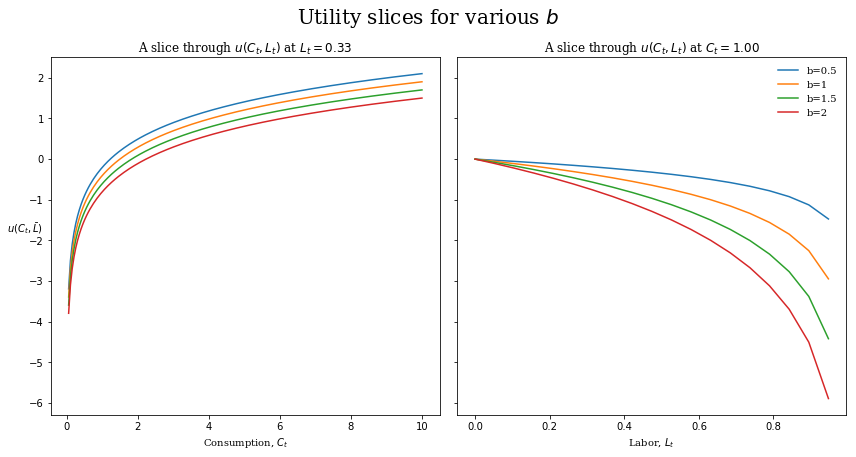

In [8]:
# fix l_bar and c_bar
L_bar, C_bar = 0.33, 1

# create a new figure object!
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(12,6))
ax1, ax2 = axes

for b in [0.5, 1.0, 1.5, 2.0]:
    
    # first subplot will fix l at some constant l_bar and plot u(C, l_bar)
    ax1.plot(consumption, u(consumption, L_bar), label='b=%g' %b)

    # axes, labels, title. legend, etc
    ax1.set_xlabel('Consumption, $C_{t}$', family='serif')
    ax1.set_ylabel(r'$u(C_{t}, \bar{L})$', rotation='horizontal')
    ax1.set_title('A slice through $u(C_{t}, L_{t})$ at $L_{t}=%.2f$' %L_bar,
                  family='serif')

    # first subplot will fix l at some constant l_bar and plot u(C, l_bar)
    ax2.plot(labor, u(C_bar, labor), label='b=%g' %b)

    # axes, labels, title. legend, etc
    ax2.set_xlabel('Labor, $L_{t}$', family='serif')
    ax2.set_title('A slice through $u(C_{t}, L_{t})$ at $C_{t}=%.2f$' %C_bar,
                  family='serif')
    
ax2.legend(loc=0, frameon=False, prop={'family':'serif'})

# tighten things up and add a title
plt.tight_layout()
plt.suptitle('Utility slices for various $b$', y=1.05, fontsize=20, family='serif') 

plt.show()

d:\Anaconda2\lib\site-packages\ipykernel\__main__.py:23: RuntimeWarning: divide by zero encountered in log
d:\Anaconda2\lib\site-packages\ipykernel\__main__.py:18: RuntimeWarning: divide by zero encountered in log
d:\Anaconda2\lib\site-packages\ipykernel\__main__.py:20: RuntimeWarning: divide by zero encountered in power
d:\Anaconda2\lib\site-packages\ipykernel\__main__.py:20: RuntimeWarning: divide by zero encountered in reciprocal


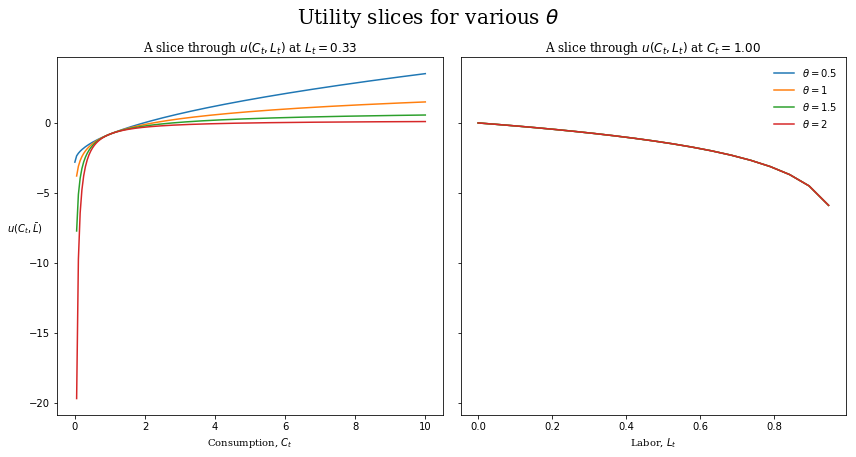

In [9]:
# fix l_bar and c_bar
L_bar, C_bar = 0.33, 1

# create a new figure object!
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(12,6))
ax1, ax2 = axes

for theta in [0.5, 1.0, 1.5, 2.0]:
    
    # first subplot will fix l at some constant l_bar and plot u(C, l_bar)
    ax1.plot(consumption, u(consumption, L_bar), label=r'$\theta=%g$' %theta)

    # axes, labels, title. legend, etc
    ax1.set_xlabel('Consumption, $C_{t}$', family='serif')
    ax1.set_ylabel(r'$u(C_{t}, \bar{L})$', rotation='horizontal')
    ax1.set_title('A slice through $u(C_{t}, L_{t})$ at $L_{t}=%.2f$' %L_bar,
                  family='serif')

    # first subplot will fix l at some constant l_bar and plot u(C, l_bar)
    ax2.plot(labor, u(C_bar, labor), label=r'$\theta=%g$' %theta)

    # axes, labels, title. legend, etc
    ax2.set_xlabel('Labor, $L_{t}$', family='serif')
    ax2.set_title('A slice through $u(C_{t}, L_{t})$ at $C_{t}=%.2f$' %C_bar,
                  family='serif')
    
ax2.legend(loc=0, frameon=False, prop={'family':'serif'})

# tighten things up and add a title
plt.tight_layout()
plt.suptitle(r'Utility slices for various $\theta$', y=1.05, fontsize=20, family='serif') 

plt.show()

d:\Anaconda2\lib\site-packages\ipykernel\__main__.py:20: RuntimeWarning: divide by zero encountered in reciprocal
d:\Anaconda2\lib\site-packages\ipykernel\__main__.py:23: RuntimeWarning: divide by zero encountered in log
d:\Anaconda2\lib\site-packages\ipykernel\__main__.py:25: RuntimeWarning: divide by zero encountered in power
d:\Anaconda2\lib\site-packages\ipykernel\__main__.py:25: RuntimeWarning: divide by zero encountered in reciprocal


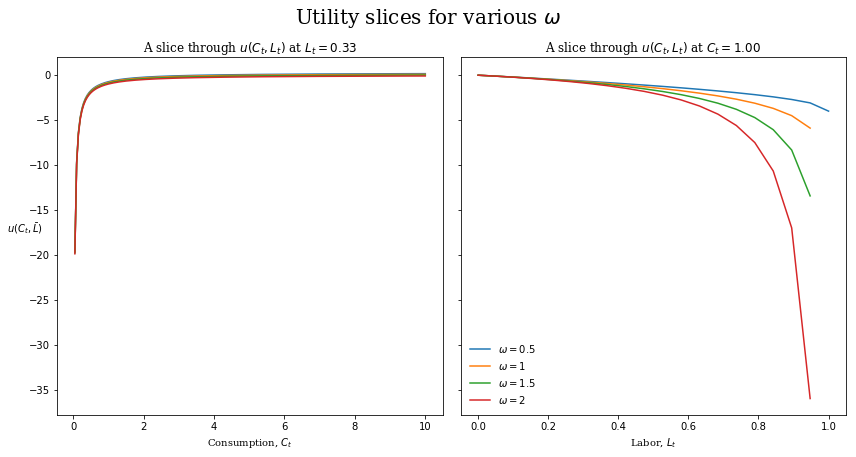

In [10]:
# fix l_bar and c_bar
L_bar, C_bar = 0.33, 1

# create a new figure object!
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(12,6))
ax1, ax2 = axes

for omega in [0.5, 1.0, 1.5, 2.0]:
    
    # first subplot will fix l at some constant l_bar and plot u(C, l_bar)
    ax1.plot(consumption, u(consumption, L_bar), label=r'$\omega=%g$' %omega)

    # axes, labels, title. legend, etc
    ax1.set_xlabel('Consumption, $C_{t}$', family='serif')
    ax1.set_ylabel(r'$u(C_{t}, \bar{L})$', rotation='horizontal')
    ax1.set_title('A slice through $u(C_{t}, L_{t})$ at $L_{t}=%.2f$' %L_bar,
                  family='serif')

    # first subplot will fix l at some constant l_bar and plot u(C, l_bar)
    ax2.plot(labor, u(C_bar, labor), label=r'$\omega=%g$' %omega)

    # axes, labels, title. legend, etc
    ax2.set_xlabel('Labor, $L_{t}$', family='serif')
    ax2.set_title('A slice through $u(C_{t}, L_{t})$ at $C_{t}=%.2f$' %C_bar,
                  family='serif')
    
ax2.legend(loc=0, frameon=False, prop={'family':'serif'})

# tighten things up and add a title
plt.tight_layout()
plt.suptitle(r'Utility slices for various $\omega$', y=1.05, fontsize=20, family='serif') 

plt.show()

# Task 2: Trade-off between consumption and leisure

In order to graphically analyze the trade-off between consumption and leisure in two dimensions we need to be able to plot the set of indifference curves implied by the household's utility function.  The code in the cell below defines a creates a contour plot of the above 3D utility surface in two dimensions and then overlays a set of contour lines for various values of utility.  These contour lines are indifference curves!

d:\Anaconda2\lib\site-packages\ipykernel\__main__.py:18: RuntimeWarning: divide by zero encountered in log
d:\Anaconda2\lib\site-packages\ipykernel\__main__.py:23: RuntimeWarning: divide by zero encountered in log
d:\Anaconda2\lib\site-packages\matplotlib\colors.py:494: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


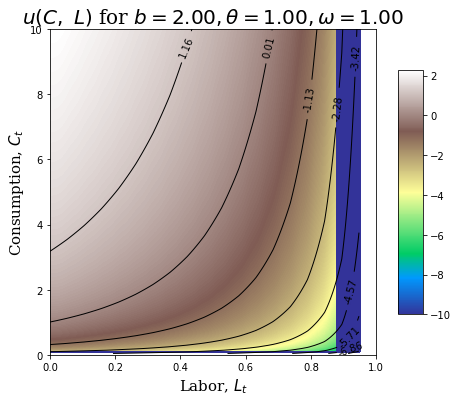

In [11]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

# Force logarithmic preferences!
b, theta, omega = 2.0, 1.0, 1.0

# we will actually plot output
utility = u(C, L)

# create the contour plot
im = ax.imshow(utility, interpolation='gaussian', origin='lower', cmap=mpl.cm.terrain, 
               vmin=-10, vmax=np.max(utility), extent=(0, 1, 0, 10), aspect=0.10)

# demarcate the contours...
CS = ax.contour(L, C, utility, np.linspace(-8, np.max(utility), 10), colors=np.repeat('k', 10), 
                linewidths=1, linestyles='solid')
ax.clabel(CS, inline=1, fmt='%1.2f')

# axes, labels, title, colorbar etc.
ax.set_xlim(0, 1)
ax.set_ylim(0, 10)
ax.set_xlabel(r'Labor, $L_{t}$', fontsize=15, family='serif')
ax.set_ylabel(r'Consumption, $C_{t}$', fontsize=15, family='serif')
ax.set_title(r'$u(C,\ L)$ for $b=%.2f, \theta=%.2f, \omega=%.2f$' %(b, theta, omega), 
             fontsize=20, family='serif')
fig.colorbar(utility_surface, shrink=0.75, aspect=10)

plt.show()

## Static model
To see what the above preferences imply about the optimal choices of household labor supply and consumption, suppose the representative agent lives for only a single period and has no initial wealth (for simplicity also assume that the houshold has only one member). These assumptions imply that the houshold budget constraint is simply $C = WL$, where $W$ is the real wage. Furthermore, for simplicity, suppose that $\theta=\omega=1$. To find optimal consumption bundle, set up the Lagrangian: 

$$\mathcal{L} \equiv ln\ C + b\ ln(1 - L) + \lambda(wL - C)\tag{2.1}$$

FOC and the budget constraint yield a system of 3 equation in 3 unknowns $C, l, \lambda$:

$$\frac{1}{C} - \lambda = 0$$

$$-\frac{b}{1 - L} + \lambda W = 0$$

$$C = WL$$

One can reduce the above to a 2 equation system in 2 unkowns by eliminating $\lambda$:

$$bC + WL = w$$

$$C - WL = 0$$

Or, equivalently 

$$\begin{vmatrix} b & \ W \\ 1 & -W\end{vmatrix} \begin{vmatrix}C \\ L \end{vmatrix} = \begin{vmatrix} W \\ 0 \end{vmatrix}$$

Note that this is a linear system of equations (which makes our life much easier!). Solving the system (via your favorite method for solving linear systems of equations) yields expressions for optimal choices of $C$ and $l$ as functions of prices (and model parameters):

$$C(W; b) = \frac{1}{1 + b}w \tag{2.2}$$

$$L(W; b) = \frac{1}{1 + b} \tag{2.3}$$

$$\lambda(W; b) = \frac{1 + b}{W} \tag{2.4}$$

Note that the household's labor supply choice is indepedent of the real wage, $W$.  This independence of labor supply and the real wage is a direct consequence of logarithmic utility and the assumption that houshold has no initial wealth and thus the income and substitution effects of a price change exactly offset one another.  Also, note that the household will choose to consum a fixed fraction of its lifetime net worth (which in the case is just the value of their labor endowment for a single period!).  This 'consume a fixed fraction of start of period net worth' decision rule is a direct consequence of logarithmic preferences.  The code in the cell below uses the linear equation solver from the SciPy linear algebra package to solve for the optimal consumption-labor bundle.

In [12]:
# specify some model parameters
b, W = 2.5, 10

# Define the coefficient matrix, A, and vector of dependent values, d, for our two equation system
A = np.array([[b, W], 
              [1, -W]]) 
d = np.array([[W], 
              [0]])

# Solve the system of equations and assign the optimal choices for consumption and labor
C_star, L_star = linalg.solve(A, d)[0,0], linalg.solve(A, d)[1,0] 
u_star = u(C_star, L_star)

print "Optimal choice of consumption:         ", C_star 
print "Optimal choice of labor supply:        ", L_star
print "Utility associated with optimal bundle:", u_star

Optimal choice of consumption:          2.85714285714
Optimal choice of labor supply:         0.285714285714
Utility associated with optimal bundle: 0.208641532946


We can show the tangency condition graphically by overlaying the budget constraint across the contour plot and then plotting the contour line/indifference curve for `u_star`. The indifference curve should be exactly tangent to the budget constraint at the optimal consumption-labor supply bundle.

d:\Anaconda2\lib\site-packages\ipykernel\__main__.py:18: RuntimeWarning: divide by zero encountered in log
d:\Anaconda2\lib\site-packages\ipykernel\__main__.py:23: RuntimeWarning: divide by zero encountered in log


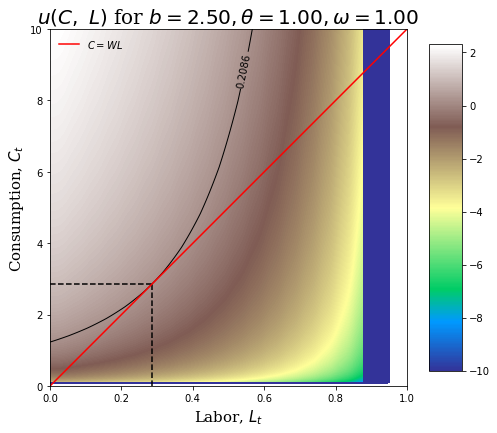

In [13]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

# we will actually plot output
utility = u(C, L)

# re-create the contour plot
im = ax.imshow(utility, interpolation='gaussian', origin='lower', cmap=mpl.cm.terrain, 
                vmin=-10, vmax=np.max(utility), extent=(0, 1, 0, 10), aspect=0.10)

# plot the budget constraint
labor_supply = np.linspace(0, 1, 100)
ax.plot(labor_supply, W * labor_supply, 'r-', label='$C=WL$')

# demarcate the indifference curve...
CS = ax.contour(L, C, utility, np.array([u_star]), colors='k', linewidths=1, 
                linestyles='solid')
ax.clabel(CS, inline=1, fmt='%1.4f')

# mark the optimal bundle
ax.hlines(C_star, 0, L_star, linestyle='dashed')
ax.vlines(L_star, 0, C_star, linestyle='dashed')

# axes, labels, title, colorbar etc.
ax.set_xlim(0, 1)
ax.set_ylim(0, 10)
ax.set_xlabel(r'Labor, $L_{t}$', fontsize=15, family='serif')
ax.set_ylabel(r'Consumption, $C_{t}$', fontsize=15, family='serif')
ax.set_title(r'$u(C,\ L)$ for $b=%.2f, \theta=%.2f, \omega=%.2f$' %(b, theta, omega), 
             fontsize=20, family='serif')
ax.legend(loc='best', frameon=False)
fig.colorbar(utility_surface, shrink=0.75, aspect=10)

plt.show()

## 2-period model
The fact that the level of wage does not effect labor supply in a static model does not mean that variations in the real wage do not impact household labor supply when the time horizon is more than one period.  Suppose that the representative household lives for two periods and that there is no uncertainty about future prices.  Because of logarithmic preferences, the household will again follow the decision rule 'consume a fraction fixed fraction of the PDV of lifetime net worth.'  We can derive this decision rule formally as follows. First, note that the household budget constraint is 

$$C_{0} + \frac{1}{1 + r_{1}}C_{1} = W_{0}L_{0} + \frac{1}{1 + r_{1}}W_{1}L_{1} \tag{2.5}$$ 

where $r_{1}$ is the real interest rate.  The Lagrangian for the household's two period optimization problem is 

$$\mathcal{L} \equiv ln(C_{0}) + b\ ln(1-L_{0}) + \beta[ln(C_{1}) + b\ ln(1-L_{1})] + \lambda\left[W_{0}L_{0} + \frac{1}{1 + r_{1}}W_{1}L_{1} - C_{0} - \frac{1}{1 + r_{1}}C_{1}\right] \tag{2.6}$$ 

The houshold now chooses sequences of consumption and labor (i.e., representative household chooses $C_{0}, C_{1}, L_{0}, L_{1}$). The FOC along with the budget constraint imply a system of 5 equations in the 5 unknowns $C_{0}, C_{1}, L_{0}, L_{1}, \lambda$ as follows:

$$\frac{1}{C_{0}} - \lambda = 0$$

$$\beta\frac{1}{C_{1}} - \lambda \frac{1}{1+r_{1}}= 0$$

$$-\frac{b}{1 - L_{0}} + \lambda W_{0} = 0$$

$$-\beta\frac{b}{1 - L_{1}} + \lambda \frac{1}{1 + r_{1}}W_{1} = 0$$

$$C_{0} + \frac{1}{1 + r_{1}}C_{1} = W_{0}L_{0} + \frac{1}{1 + r_{1}}W_{1}L_{1}$$

This 5 equation system can be reduced (by eliminating the Lagrange multiplier $\lambda$) to a linear system of 4 equations in 4 unknowns:

$$\begin{vmatrix} b & \ 0 & \ W_{0} & 0 \\\ \beta(1 + r_{1}) & -1 & 0 & 0 \\\ 0 & \ b & 0 & W_{1} \\\ 1 & \frac{1}{1 + r_{1}} & -W_{0} & -\frac{1}{1+r_{1}}W_{1} \end{vmatrix} \begin{vmatrix}C_{0} \\\ C_{1} \\\ L_{0} \\\ L_{1}\end{vmatrix} = \begin{vmatrix} W_{0} \\\ 0 \\\ W_{1} \\\ 0\end{vmatrix}$$

The above system can be solved in closde form using some method like Cramer's rule/substitution etc to yield the following optimal sequences/policies for consumption and labor supply:

$$C_{0} = \frac{1}{(1 + b)(1 + \beta)}\left(W_{0} + \frac{1}{1 + r_{1}}W_{1}\right) \tag{2.7}$$

$$C_{1} = \left(\frac{1 + r_{1}}{1 + b}\right)\left(\frac{\beta}{1 + \beta}\right)\left(W_{0} + \frac{1}{1 + r_{1}}W_{1}\right) \tag{2.8}$$

$$L_{0} = 1 - \left(\frac{b}{W_{0}}\right)\left(\frac{1}{(1 + b)(1 + \beta)}\right)\left(W_{0} + \frac{1}{1 + r_{1}}W_{1}\right) \tag{2.9}$$

$$L_{1} = 1 - \left(\frac{b\beta(1+r_{1})}{W_{1}}\right) \left(\frac{1}{(1 + b)(1 + \beta)}\right)\left(W_{0} + \frac{1}{1 + r_{1}}W_{1}\right) \tag{2.10}$$

Several important points to note about the above optimal consumption and labor supply policies. Household's lifetime net worth 

$$W_{0} + \frac{1}{1 + r_{1}}W_{1}$$

is the present discounted value of its labor endowment. Household's lifetime net worth depends on the wages in BOTH periods and future interest rate.  This hints at a more general result: if the household has an infinite time horizon, lifetime net worth depends on the entire future path of wages and interest rates! In each period, houshold's consume a fraction of their lifetime net worth. Although the fraction changes in this simple two period model, if the household has an infinite horizon, the fraction of lifetime net worth consumed each period will be fixed and equal to 

$$\frac{1}{(1 + b)(1 + \beta + \beta^2 + \dots)}=\frac{1 - \beta}{1 + b}$$

From the policy function for $L_{0}$, one can show that in order for the labor supply in period $t=0$ to be non-negative (which it must!), the following inequality must hold: 

$$\left(\frac{1}{1 + r_{1}}\right)\left(\frac{W_{1}}{W{0}}\right) \lt \frac{(1 + b)(1 + \beta)}{b} - 1$$

From the policy function for $L_{1}$, in order for the labor supply in period $t=1$ to be non-negative (which it must!), the following inequality must hold: 

$$(1 + r_{1})\left(\frac{W_{0}}{W_{1}}\right) \lt \left(\frac{1 + b}{b}\right)\left(\frac{1 + \beta}{\beta}\right) - 1$$

### Exercise

The code in the cells below walks you through some exercises deisgned to build your intuition about the inter-period tradeoffs between consumption and labor supply. Please try the following:

1. Execute the code in each of the remaining cells in the task and interpret the results.
2. Return to the cell just below this one and change the value of $b$ (either higher or lower is fine).  Given your new value of $b$ try and predict the direction of the changes to the elements of the optimal sequences of $C$ and $L$. Check that the plots confirm your intuition. Remember, that a change in $b$ is changing the weight that the household places on utility from leisure relative to utility from consumption.
3. Return to the cell just below this one and reset $b=2.5$.  Alter the prices (i.e., wages and the interest rate) so that the labor supply choice in period $t=0$ is close to zero and then regenerate and interpret the contour plots.
4. Return to the cell just below this one and reset $b=2.5$.  Alter the prices so that the labor supply choice in period $t=1$ is close to zero and then regenerate and interpret the contour plots.   

Follow along and be sure to ask questions if you get stuck!

In [14]:
# define parameter values
b, beta, theta, omega = 2.5, 0.99, 1.0, 1.0
 
# Specify some prices (i.e., wages and interest rates) all of which households take as given
W0, W1, r1 = 5, 5, 0.025

# Calculate the household's initial net worth (i.e., the PDV of his labor endowment) given these prices
networth = W0 + (1 / (1 + r1)) * W1

print "PDV of Household's net worth (i.e., labor endowment):", networth

PDV of Household's net worth (i.e., labor endowment): 9.87804878049


In [15]:
# is the non-negativity constraint on l0 satisfied by your chosen prices?
(1 / (1 + r1)) * (W1 / W0) < ((((1 + b) * (1 + beta)) / b) - 1)

True

In [16]:
# is the non-negativity constraint on l1 satisfied by your chosen prices?
(1 + r1) * (W0 / W1) < (((1 + b) / b) * ((1 + beta) / beta) - 1)

True

Define the coefficient matrix, $A$, and vector of dependent values, $d$, for our four equation system (i.e, with two periods agent must choose $C_{0}$, $L_{0}$, $C_{1}$, and $L_{1}$).

In [17]:
A = np.array([[b, 0, W0, 0], 
              [beta * (1 + r1), -1, 0, 0], 
              [0, b, 0, W1], 
              [1, 1 / (1 + r1), -W0, -(1 / (1 + r1)) * W1]])

d = np.array([[W0], 
              [0], 
              [W1], 
              [0]])

# Solve the system of equations and assign the optimal choices for consumption and labor
C_star0 = linalg.solve(A, d)[0,0]
C_star1 = linalg.solve(A, d)[1,0] 
L_star0 = linalg.solve(A, d)[2,0]
L_star1 = linalg.solve(A, d)[3,0]
u_star0 = u(C_star0, L_star0)
u_star1 = u(C_star1, L_star1)

print "Optimal C sequence:", (C_star0, C_star1) 
print "Optimal l sequence:", (L_star0, L_star1) 
print "Flow of utility:   ", (u_star0, u_star1)

Optimal C sequence: (1.4182410309386655, 1.4391600861450107)
Optimal l sequence: (0.29087948453066731, 0.28041995692749466)
Flow of utility:    (-0.50990707530324508, -0.45865910672420018)


Check that `C_star0`, as obtained above, equates to the optimal value of consumption in period t=0 derived analytically (use Python as a calculator to compute the analytic solution!). Then do the same for `C_star1`, `L_star0`, and `L_star1`.

In [18]:
# my solution 
print "Optimal C, t=0:", (1 / ((1 + b) * (1 + beta))) * (W0 + (1 / (1 + r1)) * W1)
print "Optimal C, t=1:", ((1 + r1) / (1 + b)) * (beta / (1 + beta)) * (W0 + (1 / (1 + r1)) * W1)
print "Optimal l, t=0:", 1 - (b / W0) * (1 /((1 + b) * (1 + beta))) * (W0 + (1 / (1 + r1)) * W1)
print "Optimal l, t=1:", 1 - ((b * beta * (1 + r1)) / W1) * (1 /((1 + b) * (1 + beta))) * (W0 + (1 / (1 + r1)) * W1)

Optimal C, t=0: 1.41824103094
Optimal C, t=1: 1.43916008615
Optimal l, t=0: 0.290879484531
Optimal l, t=1: 0.280419956927


Let's add the budget constraint in period $t=0$ as well as the contour line/indifference curve which satisfies the necessary tangency condition to the contour plot.

d:\Anaconda2\lib\site-packages\ipykernel\__main__.py:18: RuntimeWarning: divide by zero encountered in log
d:\Anaconda2\lib\site-packages\ipykernel\__main__.py:23: RuntimeWarning: divide by zero encountered in log


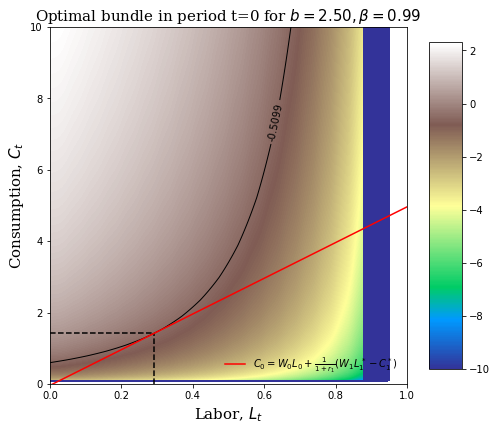

In [19]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

# we will actually plot output
utility = u(C, L)

# re-create the contour plot
im = ax.imshow(utility, interpolation='gaussian', origin='lower', cmap=mpl.cm.terrain, 
                vmin=-10, vmax=np.max(utility), extent=(0, 1, 0, 10), aspect=0.10)

# plot the budget constraint
labor_supply = np.linspace(0, 1, 100)
ax.plot(labor_supply, W0 * labor_supply + (1 / (1 + r1)) * (W1 * L_star1 - C_star1), 
        color='r', label=r'$C_{0}=W_{0}L_{0} + \frac{1}{1 + r_{1}}(W_{1}L_{1}^* - C_{1}^*)$')

# demarcate the indifference curve...
CS = ax.contour(L, C, utility, np.array([u_star0]), colors='k', linewidths=1, linestyles='solid')
ax.clabel(CS, inline=1, fmt='%1.4f')

# mark the optimal bundle
ax.hlines(C_star0, 0, L_star0, linestyle='dashed')
ax.vlines(L_star0, 0, C_star0, linestyle='dashed')

# axes, labels, title, colorbar etc.
ax.set_xlim(0, 1)
ax.set_ylim(0, 10)
ax.set_ylabel(r'Consumption, $C_{t}$', family='serif', fontsize=15)
ax.set_xlabel(r'Labor, $L_{t}$', family='serif', fontsize=15)
ax.set_title(r'Optimal bundle in period t=0 for $b=%.2f, \beta=%.2f$' %(b, beta), 
             fontsize=15, family='serif')
ax.legend(loc=4, frameon=False)
fig.colorbar(utility_surface, shrink=0.75, aspect=10)

plt.show()

Finally, we can plot the budget constraint for period $t=1$ and the indifference curve that is tangent with the budget constraint at the optimal consumption-labor bundle.

d:\Anaconda2\lib\site-packages\ipykernel\__main__.py:18: RuntimeWarning: divide by zero encountered in log
d:\Anaconda2\lib\site-packages\ipykernel\__main__.py:23: RuntimeWarning: divide by zero encountered in log


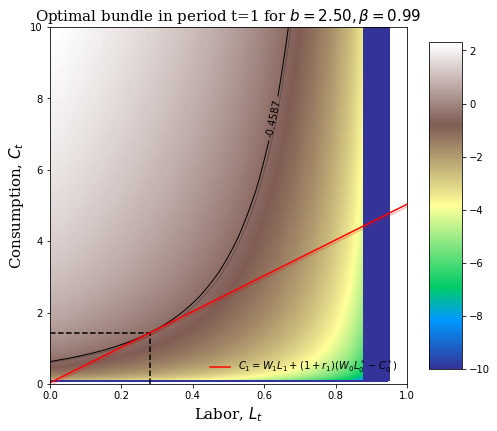

In [20]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

# we will actually plot output
utility = u(C, L)

# re-create the contour plot
im = ax.imshow(utility, interpolation='gaussian', origin='lower', cmap=mpl.cm.terrain, 
               vmin=-10, vmax=np.max(utility), extent=(0, 1, 0, 10), aspect=0.10)

# plot the budget constraint
labor_supply = np.linspace(0, 1, 100)
ax.plot(labor_supply, W0 * labor_supply + (1 / (1 + r1)) * (W1 * L_star1 - C_star1), color='r', alpha=0.25)
ax.plot(labor_supply, W1 * labor_supply + (1 + r1) * (W0 * L_star0 - C_star0), color='r',
        label=r'$C_{1} = W_{1}L_{1} + (1 + r_{1})(W_{0}L_{0}^* - C_{0}^*)$')

# demarcate the indifference curve...
CS_0 = ax.contour(L, C, utility, np.array([u_star0]), colors='k', linewidths=1, linestyles='solid', alpha=0.25)
CS_1 = ax.contour(L, C, utility, np.array([u_star1]), colors='k', linewidths=1, linestyles='solid')
ax.clabel(CS_1, inline=1, fmt='%1.4f')

# mark the optimal bundle
ax.hlines(C_star1, 0, L_star1, linestyle='dashed')
ax.vlines(L_star1, 0, C_star1, linestyle='dashed')

# axes, labels, title, colorbar etc.
ax.set_xlim(0, 1)
ax.set_ylim(0, 10)
ax.set_ylabel(r'Consumption, $C_{t}$', family='serif', fontsize=15)
ax.set_xlabel(r'Labor, $L_{t}$', family='serif', fontsize=15)
ax.set_title(r'Optimal bundle in period t=1 for $b=%.2f, \beta=%.2f$' %(b, beta),
             family='serif', fontsize=15)
ax.legend(loc=4, frameon=False)
fig.colorbar(utility_surface, shrink=0.75, aspect=10)

plt.show()

# Task 3: Solving a Real Business Cycle (RBC) Model using `Dynare++`

The remainder of the lab focuses on solving and analyzing the RBC/DSGE models using perturbation methods implemented in [`Dynare++`](http://www.dynare.org/documentation-and-support/dynarepp). Perturbation methods are *local* approximation methods: our strategy will be to pick a point in the state space of the model around which to approximate the decision rules of the representative household. Our solution will only be valid/accurate within some small neighborhood of our chosen point. Perturbation methods are fundamentally different from, say, numerical dynamic programming methods which can be used to find *global* approximations to the decision rules of the representative household.

Those interested in the mathematical machinery of perturbation methods should consult Chapters 13 and 14 of [*Numerical Methods for Economists*](http://www.amazon.co.uk/Numerical-Methods-Economics-Kenneth-Judd/dp/0262100711) and the papers included in the literature folder.

## A basic RBC model

### Firms

Representative firm has a constant returns to scale (CRTS), constant elasticity of substitution (CES) production function.

$$ Y_t = F(Z_t, K_t, L_t) = e^{Z_t} \Bigg[\alpha K_{t-1}^{\frac{\sigma - 1}{\sigma}} + (1 - \alpha) L_t^{\frac{\sigma - 1}{\sigma}}\Bigg]^{\frac{\sigma}{\sigma-1}} \tag{3.1}$$

Total factor productivity shocks, $Z_t$, are assumed to follow a first-order autoregressive process:

$$Z_t = \rho_z Z_{t-1} + \epsilon_{z,t} \tag{3.2}$$ 

where the disturbance, $\epsilon_z$, is assumed to be Gaussian with zero mean and standard deviation $\sigma_z$: $\epsilon_z \sim N(0, \sigma_z)$.  All markets are competitive and therefore factors are paid their respective marginal products.

\begin{align}
W_t =& \frac{\partial F}{\partial L_t} = \left(\frac{(1 - \alpha)L_t^{-\frac{1}{\sigma}}}{\alpha K_{t-1}^{\frac{\sigma - 1}{\sigma}} + (1 - \alpha) L_t^{\frac{\sigma - 1}{\sigma}}}\right) Y_t \tag{3.3} \\
r_t =& \frac{\partial F}{\partial K_t} = \left(\frac{\alpha K_t^{-\frac{1}{\sigma}}}{\alpha K_{t-1}^{\frac{\sigma - 1}{\sigma}} + (1 - \alpha) L_t^{\frac{\sigma - 1}{\sigma}}}\right) Y_t \tag{3.4}
\end{align}

Joint assumption of constant returns to scale and perfect competition implies that representative firm earns zero profits.

$$ Y_t = W_t L_t + r_tK_{t-1} \tag{3.5}$$


### Households

#### Preferences
The lifetime utility of the representative household is:

$$ U = E\left\{\sum_{t=0}^{\infty} \beta^t u\bigg(C_t, L_t\bigg)\right\} $$

where the flow utility function has the following form.

$$ u\bigg(C_t, L_t\bigg) = \left(\frac{C_t^{1 - \theta} - 1}{1 - \theta}\right) + b \left(\frac{(1 - L_t)^{1 - \omega} - 1}{1 - \omega}\right) $$

The parameter $0 < \theta$ is the coefficient of relative risk avesion, $0 < \omega$ is the inverse inter-temporal elasticity of substitution between current and future leisure, and $0 < b$ controls the importance of leisure in determining flow utility. Note that if $\theta = \omega = 1$, then 

$$u\bigg(C_t, L_t\bigg) = \ln C_t + b \ln (1 - L_t) $$

and we recover the flow utility function assumed by Romer and used in your lecture notes.

The household has two sources of income: labor income, $W_tL_t$, and capital income, $r_t K_{t-1}$. The household must divide its total income between consumption and investment:

$$ C_t + I_t = W_tL_t + r_tK_{t-1} $$

The household's initial stock of capital, $K_0$, is assumed given, and its capital holdings evolve as follows.

$$ K_t = (1 - \delta)K_{t-1} + I_t $$

The representative household's objective is to solve:

$$ \max_{\{C\}_{t=0}^{\infty}, \{L\}_{t=0}^{\infty}} E\left\{\sum_{t=0}^{\infty} \beta^t\Bigg[\left(\frac{C_t^{1 - \theta} - 1}{1 - 
\theta}\right) + b \left(\frac{(1 - L_t)^{1 - \omega} - 1}{1 - \omega}\right)\Bigg]\right\} $$

subject to the flow budget constraint and the equation of motion for capital stock. 

\begin{align}
C_t + I_t =& W_tL_t + r_tK_{t-1} \tag{3.6a}\\
K_t =& (1 - \delta)K_{t-1} + I_t \tag{3.6b}
\end{align}

#### Solution to household's problem

To solve the household's problem, combine the two constraints as follows:

$$ K_t = W_tL_t + (1 + r_t - \delta)K_{t-1} - C_t $$

and then form the Lagrangian.

$$ \mathcal{L} \equiv E\left\{\sum_{t=0}^{\infty} \beta^t\Bigg[\left(\frac{C_t^{1 - \theta} - 1}{1 - 
\theta}\right) + b \left(\frac{(1 - L_t)^{1 - \omega} - 1}{1 - \omega}\right) + \lambda_t\bigg[W_tL_t + (1 + r_t - \delta)K_{t-1} - C_t - K_t\bigg]\Bigg]\right\} $$

First-order necessary conditions are

\begin{align}
\frac{\partial \mathcal{L}}{\partial C_t} = 0 \implies& C_t^{-\theta} = \lambda_t \\ 
\frac{\partial \mathcal{L}}{\partial L_t} = 0 \implies& b(1 - L_t)^{-\omega} = W_t\lambda_t\\
\frac{\partial \mathcal{L}}{\partial K_t} = 0 \implies& \lambda_t = \beta E_t\bigg\{\lambda_{t+1}(1 + r_{t+1} - \delta)\bigg\} 
\end{align}

Combine the first two FOCs and we get the intra-temporal trade-off between consumption and labor. Optimal choice of $C_t$ and $L_t$ should equate the benefit from an extra unit of leisure, $b(1-L_t)^{-\omega}$, with the benefit from consuming $W_t$ units of the consumption good, $W_tC_t^{-\theta}$. 

$$ b(1 - L_t)^{-\omega} = W_tC_t^{-\theta} \tag{3.7}$$

Combine the first and the third FOCs and we get the inter-temporal trade-off between consumption (i.e., the consumption Euler equation). As usual, the consumption Euler equation implies that the optimal allocation of $C$ across time equates the benefit from an additional unit of consumption today with the *expected* benefit from and consuming that additional unit tomorrow.

$$ C_t^{-\theta} = \beta E_t\bigg\{C_{t+1}^{-\theta}(1 + r_{t+1} - \delta)\bigg\} \tag{3.8}$$

### Model summary

#### Equations
Collecting the numbered equations from above yields the following system of 9 non-linear equations (only one of which involves computing expectations) in the 8 unknowns $Y, Z, K, L, W, r, C, I$. 

\begin{align}
0 =& Y_t - e^{Z_t} \Bigg[\alpha K_{t-1}^{\frac{\sigma - 1}{\sigma}} + (1 - \alpha) L_t^{\frac{\sigma - 1}{\sigma}}\Bigg]^{\frac{\sigma}{\sigma-1}} \tag{3.1} \\ \\
0 =& Z_t  - \rho_z Z_{t-1} - \epsilon_{z,t} \tag{3.2} \\ \\
0 =& W_t - \left(\frac{(1 - \alpha)L_t^{-\frac{1}{\sigma}}}{\alpha K_{t-1}^{\frac{\sigma - 1}{\sigma}} + (1 - \alpha) L_t^{\frac{\sigma - 1}{\sigma}}}\right) Y_t \tag{3.3} \\ \\
0 =& r_t  - \left(\frac{\alpha K_t^{-\frac{1}{\sigma}}}{\alpha K_{t-1}^{\frac{\sigma - 1}{\sigma}} + (1 - \alpha) L_t^{\frac{\sigma - 1}{\sigma}}}\right) Y_t \tag{3.4} \\ \\
0 =& Y_t  - W_t L_t - r_tK_{t-1} \tag{3.5} \\ \\
0 =& C_t + I_t  - W_tL_t - r_tK_{t-1} \tag{3.6a}\\ \\
0 =& K_t  - (1 - \delta)K_{t-1} - I_t \tag{3.6b} \\ \\
0 =& b(1 - L_t)^{-\omega} - W_tC_t^{-\theta} \tag{3.7} \\ \\
0 =& C_t^{-\theta} - \beta E_t\bigg\{C_{t+1}^{-\theta}(1 + r_{t+1} - \delta)\bigg\} \tag{3.8}
\end{align}

Wait a minute! If we have 9 equations, but only 8 unknowns doesn't this mean we have an over-identified system? Yes! Equation 3.5, which defines the zero profit condition, is redundant. Why include a redundant equation? We will use equation 3.5 as a "sanity check" to confirm that we have coded the model into `Dynare++` correctly: we know that profits of the representative firm must be zero in every period, thus define an extra variable called `zero_profit` and check whether `zero_profit` $\equiv Y_t - W_t L_t - r_tK_{t-1} = 0$ holds for our solution.

#### Parameters
In order to solve the model, we will need to specify values for the following 9 parameters:

* $0 < \beta < 1$: Representative household's discount factor;
* $0 < \theta <\infty$: Representative household's coefficient of relative risk aversion;
* $0 < \omega < \infty$: Representative household's inverse of the inter-temporal elasticity of substitution of leisure;
* $0 < b < \infty$: Controls the importance of utility from leisure for the representative household;
* $0 < \delta < 1$: Depreciation factor for physical capital;
* $0 < \alpha < 1$: Controls the relative importance of capital and labor in production process;
* $0 < \sigma < \infty$: Elasticity of substitution between capital and labor in production process;
* $-1 < \rho_z < 1$: Correlation of productivity process;
* $0 < \sigma_z < \infty$: Standard deviation of productivity shocks.

Because I want to focus on the numerical techniques used to solve RBC/DSGE models, we will simple specify values for these parameters and not bother estimating them using data. However, you should be aware taht there is an enormous literature on Bayesian and Maximum Likelihood methods for estimating DSGE models. Those interested in learning how to estimate DSGE modles should start by reading the Dynare [user's guide](http://www.dynare.org/documentation-and-support/user-guide/Dynare-UserGuide-WebBeta.pdf), [reference manual](http://www.dynare.org/wp-repo/dynarewp001.pdf), and citations therein. 

### Coding the model file

Both `Dynare` and `Dynare++` require us to create a text file summarizing the model that we wish to solve. The `Dynare++` model file generally involves three commands that tell the program what are the model's variables, which of them are endogenous (and which are exogenous) and what are the model parameters.

The commands are:

* `var` starts a comma separated list of endogenous variables.
* `varexo` starts a comma separated list list of exogenous variables that will be shocked.
* `parameters` starts a comma separated list of parameters.

**Example syntax:**

    var Y, K, L, C, I, r, W, Z, zero_profit;
    varexo eps_z;
    parameters b, alpha, beta, delta, sigma, theta, omega, rho_z, sigma_z;

#### Exercise:

The code in the cells below uses the `%%writefile` IPython magic command to create a new text file in your working directory called `rbc_benchmark.mod` and add some lines of code delaring endogenous and exogenous variables. 

** N.B.: Each line of the model file must end with a semi-colon. The most common syntax error when writing model files is to forget to end the line with a semi-colon!**

In [21]:
%%writefile?

In [22]:
%%writefile rbc_benchmark.mod
////////// Declare variables //////////

/* 

///// Endogenous variables /////
   
   K: capital
   C: consumption
   Z: productivity
   Y: output
   I: investment
   W: real wage
   r: net interest rate
   L: labor supply
   zero_profit: zero profit condition

*/
var Y, K, L, C, I, r, W, Z, zero_profit;


Overwriting rbc_benchmark.mod


Next we declare the model's exogenous variables. Note the use of the `-a` option which tells IPython that we wish to append the contents of the cell to the current file `rbc_benchmark.mod`.

In [23]:
%%writefile -a rbc_benchmark.mod

///// Exogenous variables /////

// eps_z: productivity shock 
varexo eps_z;


Appending to rbc_benchmark.mod


Finally, we declare the model parameters. Note the use of the `-a` option which tells IPython that we wish to append the contents of the cell to the current file `rbc_benchmark.mod`.

In [24]:
%%writefile -a rbc_benchmark.mod

////////// Declare parameters //////////
parameters b, alpha, beta, delta, sigma, theta, omega, rho_z;


Appending to rbc_benchmark.mod


We will also need to specify values for our parameters. I prefer to specify the values of each parameter on a separate line. I always include a short comment describing each parameter.

**Example syntax:**

    // discount factor
    beta  = 0.9896;

#### Exercise:

Using the `%%writefile` IPython magic command. Add the code from the example above which specifies a value for the discount factor. Using the example syntax as a guide, add additional lines of code to the text file defining values for the remaining parameters of the model. 

* Discount factor, $\beta  = 0.9896$
* Coefficient of relative risk aversion, $\theta = 2.5$
* Inverse elasticity of substitution for leisure, $\omega = 1.5$
* Weight for leisure in utility, $b = 2.0$
* Elasticity of substitution between capital and labor, $\sigma = 0.75$
* Relative weight of capital in production, $\alpha = 0.40$
* Depreciation rate of capital, $\delta = 0.025$
* Persistence of productivity process, $\rho_z = 0.95$

** N.B.: Each line of the model file must end with a semi-colon. The most common syntax error when writing model files is to forget to end the line with a semi-colon!**

In [25]:
%%writefile -a rbc_benchmark.mod

// discount factor
# insert your code here!
beta  = 0.9896;

// coefficient of relative risk aversion
theta = 2.5;

// inverse elasticity of substitution for leisure
# insert your code here!
omega = 1.5;

// weight for leisure in utility
b = 2.0;

// elasticity of substitution between capital and labor
# insert your code here!
sigma = 0.75;

// relative weight of capital in production
alpha = 0.40;

// depreciation rate of capital
# insert your code here!
delta = 0.025;

// persistence of productivity process
rho_z = 0.95;


Appending to rbc_benchmark.mod


The model's equations are formulated in the same way in both `Dynare` and `Dynare++`: we specifiy a "model block" by inserting the following lines into our model file...  

    model;
    
    // INSERT YOUR MODEL'S EQUATIONS HERE !
    
    end;
    
The keywords `model;` and `end;` are how the program is able to find and then parse our model equations. Model equations can be specified as mathematical expressions using the following functions and operators:

* Binary operators: `+ - * / ^`.
* Unary plus and minus as in `a = -3;` and `a = +3;` respectively.
* Unary mathematical functions: `log exp sin cos tan sqrt`, where the logarithm has a natural base

The `Dynare++` manual also lists a symbolic differentiation operator `diff(expr,symbol)`, where `expr` is a mathematical expression and `symbol` is a unary symbol (i.e., a variable or a parameter); for example 

    diff(A*K(-1)^alpha*L^(1-alpha),K(-1))

is internally expanded as 

    A*alpha*K(-1)^(alpha-1)*L^(1-alpha).
    
However, I have not been able to get model files to compile when using the `diff` operator.

**Example syntax:**

    // consumption Euler equation (i.e., equation 3.7)
    C^(-theta) = beta * C(+1)^(-theta) * (1 + r(+1) - delta);

In `Dynare` and `Dynare++`, the timing of each variable reflects the period in which that variable is decided. For instance, capital stock is not decided today, but yesterday (recall that it is a function of yesterday's investment and capital stock); it is what we call in the jargon a "predetermined variable." Thus, even though in Romer's textbook (and in your lecture notes and in many published papers!) the equation of motion for capital is written 

$$ K_{t+1} = (1 - \delta)K_t + I_t$$

in order to use `Dynare` and `Dynare++` we must re-write this equation as

$$ K_t = (1 - \delta)K_{t-1} + I_t$$

which we would code in our model file as

    // household evolution of capital (i.e., equation 3.6b)
    K = (1 - delta) * K(-1) + I;

A slightly more roundabout way to explain the same thing is that for stock variables, we must use a "stock at the end of the period" convention. It is investment during period $t$ that sets stock at the end of period $t$. Again a lot of papers use the "stock at the beginning of the period" convention. There is nothing wrong with this! But if you want to use either `Dynare` or `Dynare++` to solve such a model then you will need to re-write the model using "stock at the end of the period" convention.

#### Exercise:

The code in the cell below adds the model expressions for the consumption Euler equation and the equation of motion for capital stock from the example above using the `%%writefile` IPython magic command. Using the example syntax as a guide, add additional expressions for each of the model equations. When you are finished you should have 9 equations: one for each of our 9 declared variables! Save your changes to the file `rbc_benchmark.mod`

** N.B.: Each line of the model file must end with a semi-colon. The most common syntax error when writing model files is to forget to end the line with a semi-colon!**

In [26]:
%%writefile -a rbc_benchmark.mod

////////// Model equations //////////

model;

// production (i.e., equation 3.1)
# insert your code here!

// productivity process (i.e., equation 3.2)
Z = rho_z * Z(-1) + eps_z;

// real wage (i.e., equation 3.3)
# insert your code here!
W = (((1 - alpha) * L^(-1 / sigma)) / (alpha * K(-1)^((sigma - 1) / sigma) + (1 - alpha) * L^((sigma - 1) / sigma))) * Y;


// rental rate (i.e., equation 3.4)
r = ((alpha *K(-1)^(-1 / sigma)) / (alpha * K(-1)^((sigma - 1) / sigma) + (1 - alpha) * L^((sigma - 1) / sigma))) * Y;

// check that zero profit condition holds (i.e., equation 3.5)
zero_profit = Y - W * L - r * K(-1);

// household budget constraint (i.e., equation 3.6a)
# insert your code here!

// household evolution of capital (i.e., equation 3.6b)
K = (1 - delta) * K(-1) + I;

// consumption Euler equation (i.e., equation 3.7)
# insert your code here!
C^(-theta) = beta * C(+1)^(-theta) * (1 + r(+1) - delta);
 
    
// intra-temporal consumption/labor trade-off (i.e., equation 3.8)
b * (1 - L)^(-omega) = W * C^(-theta);

end;

Appending to rbc_benchmark.mod


### Deterministic steady state
In order to solve our RBC model using perturbation methods, we need to specify a point in state space around which we will approximate the decision rules of the representative household. By convention, NOT necessity, most researchers choose to approximate the decision rules around the deterministic steady state of the model. By definition, the deterministic steady state of the model is the point in state space where the model would remain in the absence of shocks: 

$$\epsilon_{z,t} = 0\ \forall\ t\ \implies Z_t = 0\ \forall\ t. $$

To solve for the deterministic steady state of our RBC model we need to find values $\overline{Y}, \overline{K}, \overline{L}, \overline{W}, \overline{r}, \overline{C}, \overline{I}$ that jointy solve the following system of non-linear equations.

\begin{align}
0 =& \overline{Y} - \Bigg[\alpha \overline{K}^{\frac{\sigma - 1}{\sigma}} + (1 - \alpha) \overline{L}^{\frac{\sigma - 1}{\sigma}}\Bigg]^{\frac{\sigma}{\sigma-1}} \tag{3.9}\\ \\
0 =& \overline{W} - \left(\frac{(1 - \alpha)\overline{L}^{-\frac{1}{\sigma}}}{\alpha \overline{K}^{\frac{\sigma - 1}{\sigma}} + (1 - \alpha) \overline{L}^{\frac{\sigma - 1}{\sigma}}}\right) \overline{Y}  \tag{3.10}\\ \\
0 =& \overline{r} - \left(\frac{\alpha \overline{K}^{-\frac{1}{\sigma}}}{\alpha \overline{K}^{\frac{\sigma - 1}{\sigma}} + (1 - \alpha) \overline{L}^{\frac{\sigma - 1}{\sigma}}}\right) \overline{Y}  \tag{3.11}\\ \\
0 =& \overline{Y} - \overline{C} - \overline{I}  \tag{3.12}\\ \\
0 =& \overline{K} - (1 - \delta)\overline{K} - \overline{I}  \tag{3.13}\\ \\
0 =& b(1 - \overline{L})^{-\omega} - \overline{W}\overline{C}^{-\theta}  \tag{3.14}\\ \\
0 =& 1 - \beta (1 + \overline{r} - \delta)  \tag{3.15}
\end{align}

Mathematically, solving for a deterministic steady state of an RBC/DSGE model is a [root-finding problem](http://en.wikipedia.org/wiki/Root-finding_algorithm). Standard algorithms exist for solving root-finding problems (many of which have been implemented in the [`scipy.optimize`](http://docs.scipy.org/doc/scipy/reference/optimize.html) module). Those interested in the details should start with Chapter 5 of *Numerical Methods for Economists*. In practice, solving for deterministic steady state of the model can be quite difficult (particularly with large models which may have hundreds of equations that need to be solved simultaneously!). 

All algorithms for solving root finding problems require an initial guess of the correct solution in order to proceed. Sometimes (often?) any guess is good enough. However, sometimes a "good" initial guess must be supplied in order for the algorithm to terminate successfully/efficiently. Where do "good" initial guesses come from? Typically from analytic solutions to some special case of the general model.

Suppose that representative household has logarithmic preferences, $\theta=\omega=1.0$; there is full capital depreciation, $\delta=1.0$; and production is Cobb-Douglas, $\sigma = 1.0$. Under these simplifying assumptions, the equations 3.9-3.15 reduce to...

\begin{align}
0 =& \overline{Y} - \overline{K}^{\alpha}\overline{L}^{1-\alpha}  \tag{3.16}\\ \\
0 =& \overline{W} - (1 - \alpha)\frac{\overline{Y}}{\overline{L}}  \tag{3.17}\\ \\
0 =& \overline{r} - \alpha\frac{\overline{Y}}{\overline{K}}  \tag{3.18}\\ \\
0 =& \overline{Y} - \overline{C} - \overline{I}  \tag{3.19}\\ \\
0 =& \overline{K} - \overline{I} \tag{3.20}\\ \\
0 =& \frac{b}{1 - \overline{L}} - \frac{\overline{W}}{\overline{C}}  \tag{3.21}\\ \\
0 =& 1 - \beta \overline{r}  \tag{3.22}
\end{align}

Now we bust out the pen and paper! From equation 3.22 we learn that

$$ \overline{r} =\frac{1}{\beta} = \alpha \frac{\overline{Y}}{\overline{K}} \implies \frac{\overline{K}}{\overline{Y}} = \alpha\beta.$$

Combining equations 3.19 and 3.20 and then ividing through the result by $Y$ yields

$$ \frac{\overline{C}}{\overline{Y}} = 1 - \frac{\overline{K}}{\overline{Y}} = 1 - \alpha\beta \implies \frac{\overline{I}}{\overline{Y}} = \alpha\beta.$$

This result tells us that, in steady state, the representative household consumes a fraction $1-\alpha\beta$ of its income. Using this result as well as equation 3.17 to substitute for $\overline{C}$ and $\overline{W}$, repsectively, in equation 3.21 yields (after a bit of algebra!) an expression for the steady state labor supply.

$$\overline{L} = \frac{1 - \alpha}{1 - \alpha + b(1 - \alpha\beta)}$$

Substituting our expression for $\overline{L}$ into equation 3.16 and making use of previous results allows us to work out the expression for $\overline{K}$.

$$ \overline{K} = \alpha\beta \overline{Y} = \alpha\beta \overline{K}^{\alpha}\overline{L}^{1-\alpha} = \alpha\beta \overline{K}^{\alpha}\left(\frac{1 - \alpha}{1 - \alpha + b(1 - \alpha\beta)}\right)^{1-\alpha} \iff \overline{K} = (\alpha\beta)^{\frac{1}{1-\alpha}}\left(\frac{1 - \alpha}{1 - \alpha + b(1 - \alpha\beta)}\right)$$

Finally, we can solve for the steady state value of output as follows.

$$ \overline{Y} = \overline{K}^{\alpha}\overline{L}^{1-\alpha} = (\alpha\beta)^{\frac{\alpha}{1-\alpha}}\left(\frac{1 - \alpha}{1 - \alpha + b(1 - \alpha\beta)}\right)$$

We actually don't need to bother deriving expressions for $\overline{C}, \overline{I}$, and $\overline{W}$ in terms of the structural parameters of the model! In sum, we use the following initial conditions as our guess for the steady state values for the general model...

\begin{align}
\overline{L} =& \frac{1 - \alpha}{1 - \alpha + b(1 - \alpha\beta)} \tag{3.23}\\ \\
\overline{K} =& (\alpha\beta)^{\frac{1}{1-\alpha}}\overline{L} \tag{3.24}\\ \\
\overline{Y} =& (\alpha\beta)^{\frac{\alpha}{1-\alpha}}\overline{L} \tag{3.25}\\ \\
\overline{I} =& \overline{K} \tag{3.26}\\ \\
\overline{C} =& \overline{Y} - \overline{K} \tag{3.27} \\ \\
\overline{W} =& (1 - \alpha)\frac{\overline{Y}}{\overline{L}} \tag{3.28} \\ \\
\overline{r} =& \frac{1}{\beta} \tag{3.29}\\ \\
\overline{Z} =& 0 \tag{3.30}
\end{align}

In order to use the built-in `Dynare++` root-finding algorithm to find the steady state of our model, we need to get the expression defining our initial guess into our model file. The first step is to define 3 additional parameters, `KSS`, `LSS`, and `YSS`, representing the steady state values of $K$, $L$, and $Y$ for the special case of our general model. Open the file `rbc_benchmark.mod` and edit the declaration of model parameters to include `KSS`, `LSS`, and `YSS`. This line should look as follows:

    parameters b, alpha, beta, delta, sigma, theta, omega, rho_z, KSS, LSS, YSS;

Now we need to add additional lines of code to define the values of `KSS`, `LSS`, and `YSS` in terms of the structural parameters of the model. Add the following lines of code to the `rbc_benchmark.mod` file (in the section where the structural parameters of the model are given values...NOT at the end of the file!):

    // steady state labor supply (computed for theta=omega=delta=sigma=1)
    LSS = (1 - alpha) / (1 - alpha + b * (1 - alpha * beta));

    // steady state capital (computed for theta=omega=delta=sigma=1)
    KSS =  (alpha * beta)^(1 / (1 - alpha)) * LSS;

    // steady state output (computed for theta=omega=delta=sigma=1)
    YSS = KSS^alpha * LSS^(1 - alpha);

We now specify our initial guess for the deterministic steady state of our general model by adding an "initial value block" to the end of the file `rbc_benchmark.mod` (i.e., *after* the model block!).

In [27]:
%%writefile -a rbc_benchmark.mod

////////// Initial values for computing steady state //////////

initval;
K = KSS;
L = LSS;
Y = YSS;
C = (1 - alpha * beta) * YSS;
Z = 0.0;
I = alpha * beta * YSS;
W = (1 - alpha) * (YSS / LSS);
r = (1 / beta);
zero_profit = 0.0;
end;

Appending to rbc_benchmark.mod


### Variance-covariance structure of the exogenous shocks

To complete the specification of our model, we need to specify the variance-covariance structure or the shocks driving the economy. In more complicated models, this matrix might be very large. In our toy RBC model, this matrix is the scalar $\sigma_z$. My parameterization sets $\sigma_z^2=0.007$. Add the following code to the bottom of the `rbc_benchmark.mod` file.

In [28]:
%%writefile -a rbc_benchmark.mod

////////// Variance covariance matrix //////////
vcov = [0.007];

Appending to rbc_benchmark.mod


## Introducing `Dynare++`
`Dynare++` is a standalone C++ version of [`Dynare`](http://www.dynare.org/) specialized in computing $k$-order [Taylor approximations](http://en.wikipedia.org/wiki/Taylor_series) of dynamic stochastic general equilibrium (DSGE) models (if you weren't already aware, RBC models are a special case of DSGE models). The current version of `Dynare++` is capable of approximating the decision rules (i.e., policy functions) around either a deterministic or stochastic steady state, run simulations, generate IRFs, etc. It is also able to check approximation errors of the solution.

The main features of `Dynare++` are:

* Completely standalone, no need to install MATLAB® or GNU Octave
* Output readable in MATLAB® and GNU Octave (and Python!)
* Contains a tensor library for evaluation of Faa Di Bruno formula
* Highly parallelized
* Takes advantage of kronecker product structure
* Links with ATLAS and LAPACK (industry standard linear algebra libraries)
* Includes numerical integration module
* Includes parser and derivator doing all derivatives symbolically

I am only going to demonstrate a small subset of the functionality of `Dynare` and `Dynare++`. However, I have included .pdf copies of the Dynare user guide and reference manual, as well as a `Dynare++` tutorial. Those of you interested in pursuing RBC/DSGE modelling for your MSc disseration or future PhD research should read these documents at some point.

### What are Taylor approximations?

In [29]:
def f(x):
    """Example function for demonstrating Taylor approximations."""
    return x**0.25

f_1st_order = interpolate.approximate_taylor_polynomial(f, x=1, degree=1, scale=0.01)
f_2nd_order = interpolate.approximate_taylor_polynomial(f, x=1, degree=2, scale=0.01)
f_3rd_order = interpolate.approximate_taylor_polynomial(f, x=1, degree=3, scale=0.01)
f_4th_order = interpolate.approximate_taylor_polynomial(f, x=1, degree=4, scale=0.01)
f_5th_order = interpolate.approximate_taylor_polynomial(f, x=1, degree=5, scale=0.01)

d:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in power
  app.launch_new_instance()


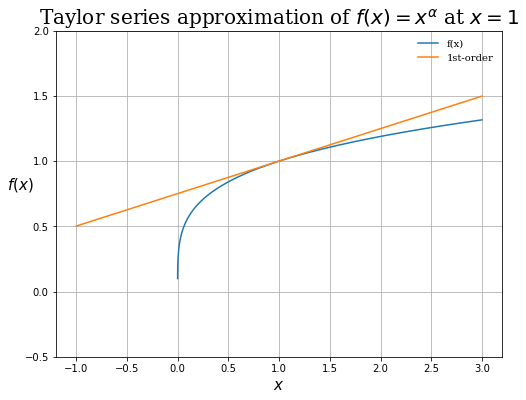

In [30]:
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)

# grid of points to evaluate function and its approximations
grid = np.linspace(-1, 3, 10000)

# plots of the function and its approximations (need to translate Taylor polynomial!)
ax1.plot(grid, f(grid), label='f(x)')
ax1.plot(grid, f_1st_order(grid - 1), label='1st-order')
#ax1.plot(grid, f_2nd_order(grid - 1), label='2nd-order')
#ax1.plot(grid, f_3rd_order(grid - 1), label='3rd-order')
#ax1.plot(grid, f_4th_order(grid - 1), label='4th-order')
#ax1.plot(grid, f_5th_order(grid - 1), label='5th-order')

# axes, labels, title, legend, etc...
ax1.set_xlabel('$x$', fontsize=15)
ax1.set_ylabel('$f(x)$', rotation='horizontal', fontsize=15)
ax1.set_title(r'Taylor series approximation of $f(x) = x^{\alpha}$ at $x=1$', fontsize=20, family='serif')
ax1.set_ylim(-0.5, 2.0)
ax1.grid()
ax1.legend(loc='best', frameon=False, prop={'family':'serif'})

plt.show()

Execute the following command in order to confirm that Dynare++ has been added to your path correctly, and that it is fully functional. **N.B.: The `!` tells IPython to send to command to your OS shell.** 

In [31]:
# confirm the Dynare++ is installed correctly!
# or !C:\dynare\4.4.3\dynare++\dynare++
!dynare++

usage: dynare++ [--help] [--version] [options] <model file>

    --help               print this message and return
    --version            print version and return

options:
    --per <num>          number of periods simulated after burnt [100]
    --burn <num>         number of periods burnt [0]
    --sim <num>          number of simulations [80]
    --rtper <num>        number of RT periods simulated after burnt [0]
    --rtsim <num>        number of RT simulations [0]
    --condper <num>      number of periods in cond. simulations [0]
    --condsim <num>      number of conditional simulations [0]
    --steps <num>        steps towards stoch. SS [0=deter.]
    --centralize         centralize the rule [do centralize]
    --no-centralize      do not centralize the rule [do centralize]
    --prefix <string>    prefix of variables in Mat-4 file ["dyn"]
    --seed <num>         random number generator seed [934098]
    --order <num>        order of approximation [no default]
    --threa

In [48]:
# solve the model via linearization around the deterministic steady state...
!dynare++ --order 1 --no-centralize --seed 42 --check PE --per 500 --check-num 100 rbc_benchmark_answers.mod

# convert the output into a Python dictionary
rbc_order1 = io.loadmat('rbc_benchmark_answers.mat')

Remember that Python dictionaries store information in key-value pairs. Our Python dictionary `rbc_order1` has the following keys....

In [49]:
# returns a list of the dictionary keys...
rbc_order1.keys()

['dyn_i_L',
 'dyn_i_K',
 'dyn_irfp_eps_z_mean',
 'dyn_i_I',
 'dyn_i_C',
 'dyn_ss',
 'dyn_simul_errors',
 'dyn_i_Z',
 'dyn_i_Y',
 'dyn_i_W',
 'dyn_ellipse_errors',
 'dyn_vcov',
 'dyn_nboth',
 'dyn_nstat',
 'dyn_vcov_exo',
 '__version__',
 'dyn_i_r',
 'dyn_vars',
 'dyn_steady_states',
 'dyn_irfp_eps_z_var',
 'dyn_i_zero_profit',
 'dyn_state_vars',
 'dyn_g_1',
 'dyn_g_0',
 'dyn_mean',
 'dyn_simul_points',
 'dyn_irfm_eps_z_var',
 'dyn_irfm_eps_z_mean',
 'dyn_i_eps_z',
 'dyn_npred',
 'dyn_nforw',
 '__header__',
 '__globals__',
 'dyn_ellipse_points',
 'dyn_shocks']

We can access the values of the `rbc_order1` dictionary using these keys. For example, if we want to access an array of endogenous variable names sorted by the `Dynare++` internal ordering then we type...

In [50]:
rbc_order1['dyn_vars']

array([u'Y          ', u'I          ', u'W          ', u'L          ',
       u'zero_profit', u'K          ', u'Z          ', u'C          ',
       u'r          '], 
      dtype='<U11')

...since we will be needing the indicies for our variables frequently in the code below we will store them in a Python dictionary.

In [51]:
# create a dictionary using a dict comprehension
rbc_variable_indices = {rbc_order1['dyn_vars'][i]:i for i in range(rbc_order1['dyn_vars'].size)}

# display the result
rbc_variable_indices

{u'C          ': 7,
 u'I          ': 1,
 u'K          ': 5,
 u'L          ': 3,
 u'W          ': 2,
 u'Y          ': 0,
 u'Z          ': 6,
 u'r          ': 8,
 u'zero_profit': 4}

If we want to access the array which stores the steady state values of the endogenous variables in the model, then we type...

In [52]:
rbc_order1['dyn_ss'] 

array([[  8.37621463e-01],
       [  1.28758600e-01],
       [  1.72830714e+00],
       [  3.78831027e-01],
       [  1.62566559e-13],
       [  5.15034401e+00],
       [  2.77447713e-23],
       [  7.08862863e-01],
       [  3.55092967e-02]])

A detailed description of each of the keys can be found in section 7.2 of the [Dynare++ tutorial](http://www.dynare.org/documentation-and-support/dynarepp/dynare-tutorial.pdf).

## Plotting impulse response functions

By default, `Dynare++` simulates impulse response functions (IRFs) for all endogenous variables of the model. We can access the simulated IRFS using the appropriate dictionary keys. 

* `'dyn_irfm_eps_z_mean'` for negative shocks 
* `'dyn_irfp_eps_z_mean'` for postive shocks.

**Note the subtle difference in the IRF keys!**

In [53]:
# variables are ordering according to rbc_order1['dyn_vars']
Y_bar, I_bar, W_bar, L_bar, zero_profit_bar, K_bar, Z_bar, C_bar, r_bar = rbc_order1['dyn_ss'] 

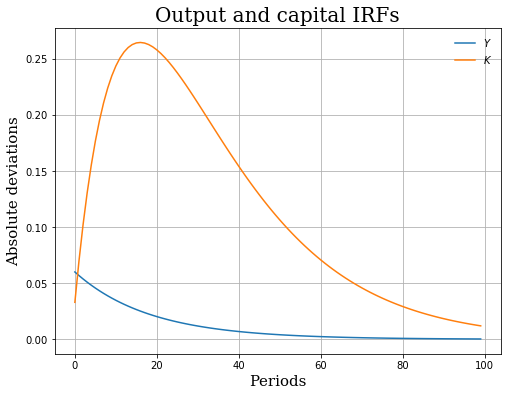

In [54]:
plt.figure(figsize=(8,6))

# absolute deviations of Y and K in response to positive productivity shock
plt.plot(rbc_order1['dyn_irfp_eps_z_mean'][0,:100], label='$Y$')
plt.plot(rbc_order1['dyn_irfp_eps_z_mean'][5,:100], label='$K$')

plt.xlabel('Periods', fontsize=15, family='serif')
plt.ylabel('Absolute deviations', fontsize=15, family='serif')
plt.title("Output and capital IRFs", fontsize=20, family='serif')
plt.legend(loc='best', frameon=False, prop={'family':'serif'})
plt.grid()

plt.show()

By default `Dynare++` computes IRFs representing absolute deviations from the deterministic steady state. If we want IRFs representing percentage deviations then we will need to code them ourselves...

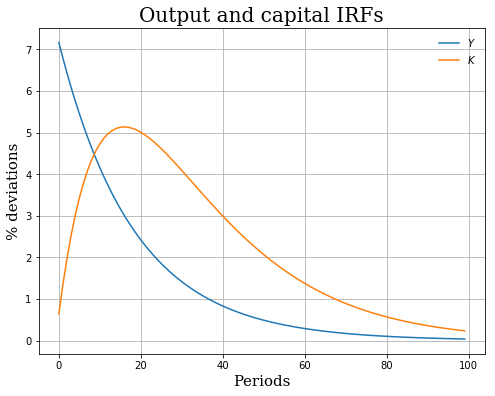

In [55]:
plt.figure(figsize=(8,6))

# percentage deviations of Y and K in response to positive productivity shock
plt.plot(100 * rbc_order1['dyn_irfp_eps_z_mean'][0,:100] / Y_bar, label='$Y$')
plt.plot(100 * rbc_order1['dyn_irfp_eps_z_mean'][5,:100] / K_bar, label='$K$')

plt.xlabel('Periods', fontsize=15, family='serif')
plt.ylabel('% deviations', fontsize=15, family='serif')
plt.title("Output and capital IRFs", fontsize=20, family='serif')
plt.legend(loc='best', frameon=False, prop={'family':'serif'})
plt.grid()

plt.show()

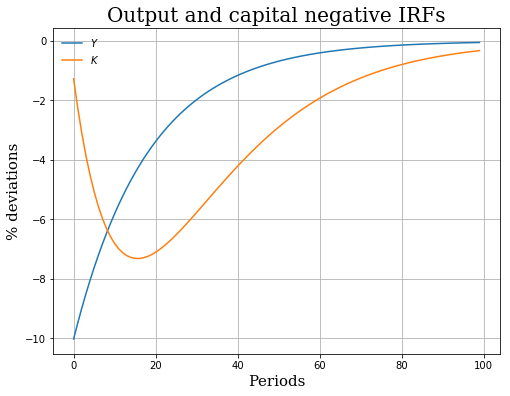

In [56]:
plt.figure(figsize=(8,6))

# percentage deviations of Y and K in response to positive productivity shock
plt.plot(100 * rbc_order1['dyn_irfm_eps_z_mean'][0,:100] / Y_bar, label='$Y$')
plt.plot(100 * rbc_order1['dyn_irfm_eps_z_mean'][5,:100] / K_bar, label='$K$')

plt.xlabel('Periods', fontsize=15, family='serif')
plt.ylabel('% deviations', fontsize=15, family='serif')
plt.title("Output and capital negative IRFs", fontsize=20, family='serif')
plt.legend(loc='best', frameon=False, prop={'family':'serif'})
plt.grid()

plt.show()

Here we plot the responses of consumption, output, and investment to a negative productivity shock.

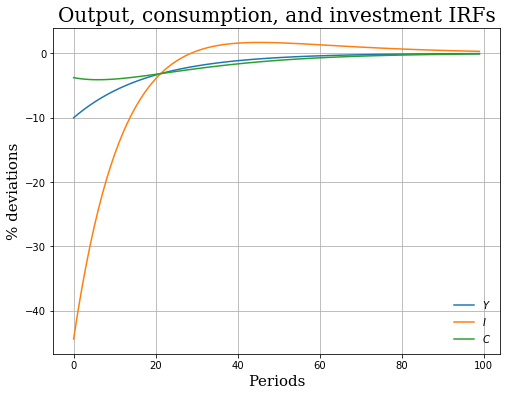

In [41]:
plt.figure(figsize=(8,6))

# irfs for output, investment, and consumption in response to negative productivity shock 
plt.plot(100 * rbc_order1['dyn_irfm_eps_z_mean'][0,:100] / Y_bar, label='$Y$')
plt.plot(100 * rbc_order1['dyn_irfm_eps_z_mean'][1,:100] / I_bar, label='$I$')
plt.plot(100 * rbc_order1['dyn_irfm_eps_z_mean'][7,:100] / C_bar, label='$C$')

plt.xlabel('Periods', fontsize=15, family='serif')
plt.ylabel('% deviations', fontsize=15, family='serif')
plt.title("Output, consumption, and investment IRFs", fontsize=20, family='serif')
plt.legend(loc='best', frameon=False, prop={'family':'serif'})
plt.grid()

plt.show()

### Exercise:

Using the above code snippets as a guide, plot the IRFs for the real wage and the labor supply in response to positive and negative productivity shocks.

In [42]:
# display the result
rbc_variable_indices

{u'C          ': 7,
 u'I          ': 1,
 u'K          ': 5,
 u'L          ': 3,
 u'W          ': 2,
 u'Y          ': 0,
 u'Z          ': 6,
 u'r          ': 8,
 u'zero_profit': 4}

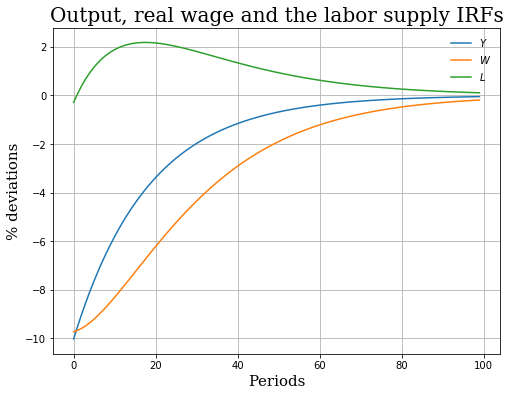

In [44]:
# insert your code here!


plt.figure(figsize=(8,6))

# irfs for real wage and the labor supply  in response to negative productivity shock 
plt.plot(100 * rbc_order1['dyn_irfm_eps_z_mean'][0,:100] / Y_bar, label='$Y$')
plt.plot(100 * rbc_order1['dyn_irfm_eps_z_mean'][2,:100] / W_bar, label='$W$')
plt.plot(100 * rbc_order1['dyn_irfm_eps_z_mean'][3,:100] / L_bar, label='$L$')

plt.xlabel('Periods', fontsize=15, family='serif')
plt.ylabel('% deviations', fontsize=15, family='serif')
plt.title("Output, real wage and the labor supply IRFs", fontsize=20, family='serif')
plt.legend(loc='best', frameon=False, prop={'family':'serif'})
plt.grid()

plt.show()

## Generating simulated data from the model

An array of simulated time series data from the model can be accessed using the `'dyn_simul_points'` key. Rows correspond to endogenous variables, columns to periods. Appears only if `--check P` option was passed when the solution was computed. The following code will produce a time series plot for $Y$...

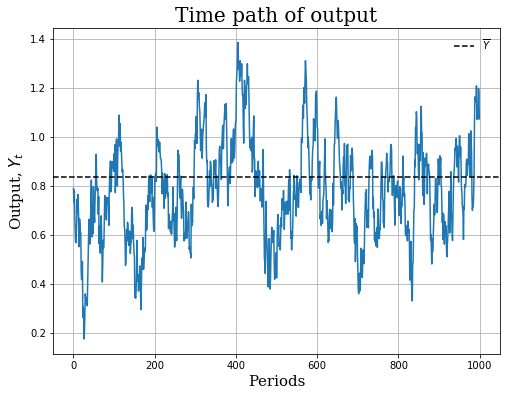

In [45]:
plt.figure(figsize=(8,6))

# simulated data 
plt.plot(rbc_order1['dyn_simul_points'][0,:])
plt.axhline(Y_bar, ls='dashed', color='k', label=r'$\overline{Y}$')

plt.xlabel('Periods', fontsize=15, family='serif')
plt.ylabel('Output, $Y_t$', fontsize=15, family='serif')
plt.title("Time path of output", fontsize=20, family='serif')
plt.legend(loc='best', frameon=False, prop={'family':'serif'})
plt.grid()

plt.show()

Here is a time series plot for consumption, $C_t$...

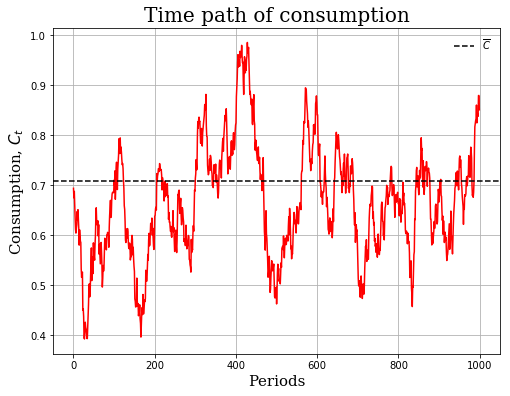

In [46]:
plt.figure(figsize=(8,6))

# simulated data 
plt.plot(rbc_order1['dyn_simul_points'][7,:], color='r')
plt.axhline(C_bar, ls='dashed', color='k', label=r'$\overline{C}$')

plt.xlabel('Periods', fontsize=15, family='serif')
plt.ylabel('Consumption, $C_t$', fontsize=15, family='serif')
plt.title("Time path of consumption", fontsize=20, family='serif')
plt.legend(loc='best', frameon=False, prop={'family':'serif'})
plt.grid()

plt.show()

### Exercise:

Using the above code snippets as a guide, create time series plots of investment, the real wage and the rental rate of capital.

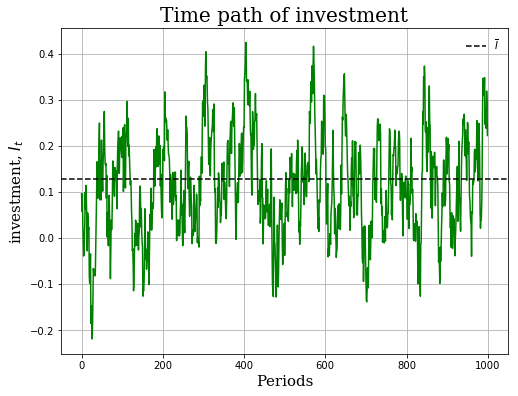

In [59]:
# insert your code here!

plt.figure(figsize=(8,6))

# simulated data 
plt.plot(rbc_order1['dyn_simul_points'][1,:], color='g')
plt.axhline(I_bar, ls='dashed', color='k', label=r'$\overline{I}$')

plt.xlabel('Periods', fontsize=15, family='serif')
plt.ylabel('investment, $I_t$', fontsize=15, family='serif')
plt.title("Time path of investment", fontsize=20, family='serif')
plt.legend(loc='best', frameon=False, prop={'family':'serif'})
plt.grid()

plt.show()



## Error analysis
Passing the `--check P` command line option runs a random simulation and at each time point computes the model's residuals from following the approximately optimal policies for choosing consumption and labor supply. Ideally, these residuals would be zero for all $t$.

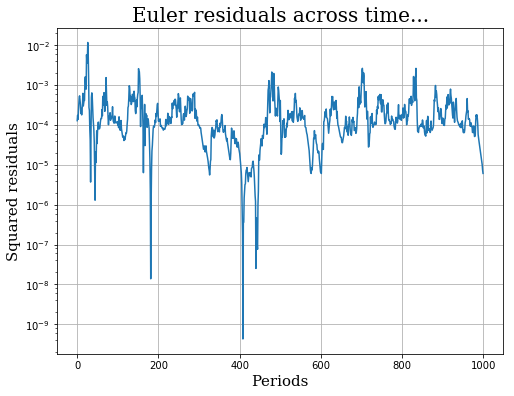

In [60]:
plt.figure(figsize=(8,6))

# consumption euler residual across time
euler_residuals_time = rbc_order1['dyn_simul_errors'][7,:]
plt.plot(euler_residuals_time**2)

plt.yscale('log')
plt.xlabel('Periods', fontsize=15, family='serif')
plt.ylabel('Squared residuals', fontsize=15, family='serif')
plt.title('Euler residuals across time...', fontsize=20, family='serif')
plt.grid()

plt.show()

Passing the `--check E` command line option calculates the model residuals on an ellipse of the state variables.  The method calculates the residuals at [low discrepancy sequence](http://en.wikipedia.org/wiki/Low-discrepancy_sequence) of points on the ellipse. The "size" of the ellipse is controled by the `--check-scale float` command line option. This sets the scaling factor for checking on ellipse to `0.5 * float`. Default is value if 2.0. Both the residuals,  `'dyn_ellipse_errors'`, and the points, `'dyn_ellipse_points'`, are reported.

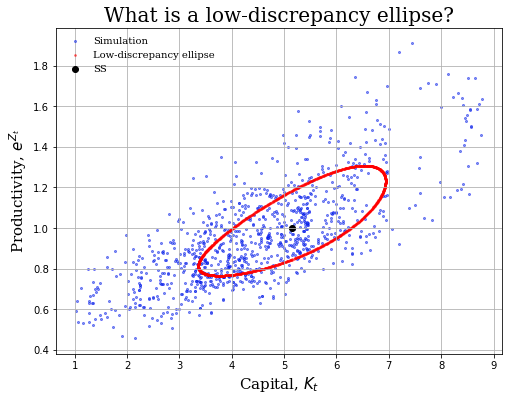

In [61]:
plt.figure(figsize=(8,6))

# plot simulated data in state space
simulated_K, simulated_Z = rbc_order1['dyn_simul_points'][5,:], rbc_order1['dyn_simul_points'][6,:]
plt.scatter(simulated_K, np.exp(simulated_Z), s=4.0, edgecolor='b', alpha=0.5, label='Simulation')

# plot the low discrepancy set in state space
ellipse_K, ellipse_Z = rbc_order1['dyn_ellipse_points'][0,:], rbc_order1['dyn_ellipse_points'][1,:]
plt.scatter(ellipse_K, np.exp(ellipse_Z), s=3.0, color='r', edgecolor='r', alpha=0.5, label='Low-discrepancy ellipse')

# demarcate the deterministic steady state
plt.scatter(K_bar, 1.0, color='k', label='SS')
    
plt.xlabel('Capital, $K_t$', fontsize=15, family='serif')
plt.ylabel('Productivity, $e^{Z_t}$', fontsize=15, family='serif')
plt.title('What is a low-discrepancy ellipse?', fontsize=20, family='serif')
plt.legend(loc=2, frameon=False, prop={'family':'serif'})
plt.grid()

plt.show()

d:\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


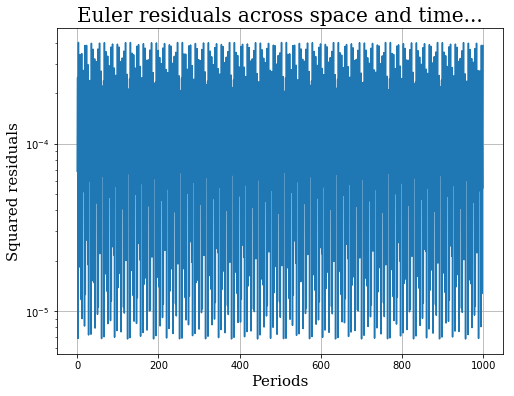

In [62]:
plt.figure(figsize=(8,6))

# consumption euler residual across space and time
euler_residuals_spacetime = rbc_order1['dyn_ellipse_errors'][7,:]
plt.plot(euler_residuals_spacetime**2)

plt.yscale('log')
plt.xlabel('Periods', fontsize=15, family='serif')
plt.ylabel('Squared residuals', fontsize=15, family='serif')
plt.title('Euler residuals across space and time...', fontsize=20, family='serif')
plt.legend(loc='best', frameon=False, prop={'family':'serif'})
plt.grid()

plt.show()

## Variance-covariance matrix

We can use the variance-covariance matrix of our model to assess how well the correlation structure or our model matches the correlation structure of the real world. The simplest way of "calibrating" a DSGE/RBC model is to choose some data targets (i.e., observed variances/covariances of/between variables like GDP, capital stock, labor supply, wages, etc.) and then choose model parameters so that the model variances/covariances are "close" to the target values.

In [63]:
# the variance-covariance matrix for the endogenous variables
rbc_order1['dyn_vcov']

array([[  4.67976180e-02,   2.21319670e-02,   1.28473345e-01,
         -5.24076923e-03,   9.08252071e-15,   2.72194951e-01,
          5.58104553e-02,   2.46656510e-02,  -3.73111813e-04],
       [  2.21319670e-02,   1.25413158e-02,   5.33295325e-02,
         -1.22890323e-03,   2.38710905e-15,   7.83708134e-02,
          2.60957886e-02,   9.59065118e-03,   3.21436992e-04],
       [  1.28473345e-01,   5.33295325e-02,   3.79304021e-01,
         -1.88627096e-02,   3.17683635e-14,   9.27604150e-01,
          1.54285686e-01,   7.51438130e-02,  -2.80741055e-03],
       [ -5.24076923e-03,  -1.22890323e-03,  -1.88627096e-02,
          1.33964188e-03,  -2.16664137e-15,  -6.08172506e-02,
         -6.42997692e-03,  -4.01186601e-03,   3.41703966e-04],
       [  9.08252071e-15,   2.38710905e-15,   3.17683635e-14,
         -2.16664137e-15,   3.51815912e-27,   9.91519763e-14,
          1.11064324e-14,   6.69541166e-15,  -5.30421970e-16],
       [  2.72194951e-01,   7.83708134e-02,   9.27604150e-01,
   

In [64]:
# compute standard deviations of endogenous variables
std_vars = np.sqrt(rbc_order1['dyn_vcov'].diagonal())

# correlation coefficients for endogenous variables
rbc_order1['dyn_corr'] = rbc_order1['dyn_vcov'] / (std_vars[np.newaxis,:] * std_vars[:,np.newaxis])

In [65]:
# examine the correlation structure: recalle ordering is Y, I, W, L, zero_profit, K, Z, C, r
np.round(rbc_order1['dyn_corr'], 2)

array([[ 1.  ,  0.91,  0.96, -0.66,  0.71,  0.75,  1.  ,  0.93, -0.16],
       [ 0.91,  1.  ,  0.77, -0.3 ,  0.36,  0.42,  0.9 ,  0.7 ,  0.26],
       [ 0.96,  0.77,  1.  , -0.84,  0.87,  0.9 ,  0.97,  0.99, -0.41],
       [-0.66, -0.3 , -0.84,  1.  , -1.  , -0.99, -0.68, -0.89,  0.84],
       [ 0.71,  0.36,  0.87, -1.  ,  1.  ,  1.  ,  0.73,  0.92, -0.81],
       [ 0.75,  0.42,  0.9 , -0.99,  1.  ,  1.  ,  0.77,  0.94, -0.77],
       [ 1.  ,  0.9 ,  0.97, -0.68,  0.73,  0.77,  1.  ,  0.94, -0.18],
       [ 0.93,  0.7 ,  0.99, -0.89,  0.92,  0.94,  0.94,  1.  , -0.51],
       [-0.16,  0.26, -0.41,  0.84, -0.81, -0.77, -0.18, -0.51,  1.  ]])

In [66]:
# correlation between the real wage and the labor supply
rbc_order1['dyn_corr'][2,3]

-0.83678906606094761

## Going for higher order approximations

[Research suggests](http://www.sciencedirect.com/science/article/pii/S0165188905001740) that first-order approximations around a deterministic steady state can be very inaccurate. The inaccuracy of first-order approximations is particularly accute when there are lots of binding constraints or other extreme forms of non-linearity. As a rough "rule-of-thumb": the more "interesting" is your model, the more inaccurate will be a first-order approximation of it! 

These numerical analysis results are largely ignored by economists. Very few papers bother to check the accuracy of their linear approximations (or at least very few papers report any error analysis). Very few papers bother to assess how either the qualitative or quantitative predictions of their models are effected by the order of approximation. 

As we will see, when using `Dynare++`, the marginal cost of generating higher order approximations is extremely low... 

In [67]:
!dynare++

usage: dynare++ [--help] [--version] [options] <model file>

    --help               print this message and return
    --version            print version and return

options:
    --per <num>          number of periods simulated after burnt [100]
    --burn <num>         number of periods burnt [0]
    --sim <num>          number of simulations [80]
    --rtper <num>        number of RT periods simulated after burnt [0]
    --rtsim <num>        number of RT simulations [0]
    --condper <num>      number of periods in cond. simulations [0]
    --condsim <num>      number of conditional simulations [0]
    --steps <num>        steps towards stoch. SS [0=deter.]
    --centralize         centralize the rule [do centralize]
    --no-centralize      do not centralize the rule [do centralize]
    --prefix <string>    prefix of variables in Mat-4 file ["dyn"]
    --seed <num>         random number generator seed [934098]
    --order <num>        order of approximation [no default]
    --threa

In [68]:
# go ahead and compute up to 5th order approximations around the deterministic steady state
!dynare++ --order 2 --no-centralize --seed 42 --check PE rbc_benchmark_answers.mod
rbc_order2 = io.loadmat('rbc_benchmark_answers.mat')

!dynare++ --order 3 --no-centralize --seed 42 --check PE rbc_benchmark_answers.mod
rbc_order3 = io.loadmat('rbc_benchmark_answers.mat')

!dynare++ --order 4 --no-centralize --seed 42 --check PE rbc_benchmark_answers.mod
rbc_order4 = io.loadmat('rbc_benchmark_answers.mat')

!dynare++ --order 5 --no-centralize --seed 42 --check PE rbc_benchmark_answers.mod
rbc_order5 = io.loadmat('rbc_benchmark_answers.mat')

In [69]:
# deterministic steady state values do not depend on the order of approximation
Y_bar, I_bar, W_bar, L_bar, zero_profit_bar, K_bar, Z_bar, C_bar, r_bar = rbc_order1['dyn_ss'] 

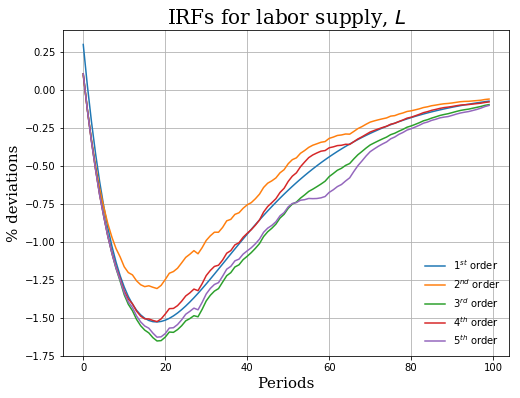

In [70]:
plt.figure(figsize=(8,6))

# irfs for labor supply
plt.plot(100 * rbc_order1['dyn_irfp_eps_z_mean'][3,:100] / L_bar, label='$1^{st}$ order')
plt.plot(100 * rbc_order2['dyn_irfp_eps_z_mean'][3,:] / L_bar, label='$2^{nd}$ order')
plt.plot(100 * rbc_order3['dyn_irfp_eps_z_mean'][3,:] / L_bar, label='$3^{rd}$ order')
plt.plot(100 * rbc_order4['dyn_irfp_eps_z_mean'][3,:] / L_bar, label='$4^{th}$ order')
plt.plot(100 * rbc_order5['dyn_irfp_eps_z_mean'][3,:] / L_bar, label='$5^{th}$ order')
 
plt.xlabel('Periods', fontsize=15, family='serif')
plt.ylabel('% deviations', fontsize=15, family='serif')
plt.title("IRFs for labor supply, $L$", fontsize=20, family='serif')
plt.legend(loc='best', frameon=False)
plt.grid()

plt.show()

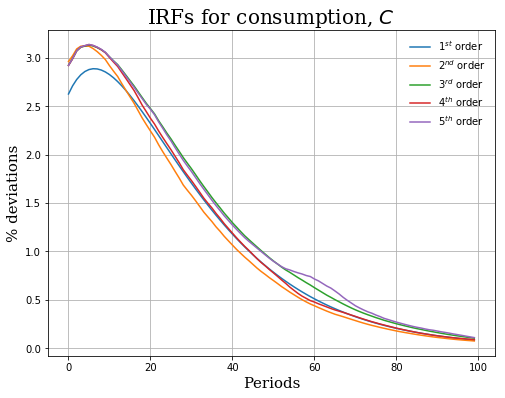

In [71]:
plt.figure(figsize=(8,6))

# irfs for consumption
plt.plot(100 * rbc_order1['dyn_irfp_eps_z_mean'][7,:100] / C_bar, label='$1^{st}$ order')
plt.plot(100 * rbc_order2['dyn_irfp_eps_z_mean'][7,:] / C_bar, label='$2^{nd}$ order')
plt.plot(100 * rbc_order3['dyn_irfp_eps_z_mean'][7,:] / C_bar, label='$3^{rd}$ order')
plt.plot(100 * rbc_order4['dyn_irfp_eps_z_mean'][7,:] / C_bar, label='$4^{th}$ order')
plt.plot(100 * rbc_order5['dyn_irfp_eps_z_mean'][7,:] / C_bar, label='$5^{th}$ order')

plt.xlabel('Periods', fontsize=15, family='serif')
plt.ylabel('% deviations', fontsize=15, family='serif')
plt.title("IRFs for consumption, $C$", fontsize=20, family='serif')
plt.legend(loc='best', frameon=False)
plt.grid()

plt.show()

Although IRFs are relatively robust to higher order approximations, the variance-covariance matrix of endogenous variables can be highly sensitive to the order of approximation. **This implies that calibration/estimation results are likely to be highly dependent on order of approximation!** 

# Task 4: Where to go to learn more:

[Prof. Lawrence Christiano](http://faculty.wcas.northwestern.edu/~lchrist/) has made his lecture slides and code for some of his short courses avaiable:

* 5-day course on ["Formulation, Estimation and Policy Analysis with DSGE Models"](http://faculty.wcas.northwestern.edu/~lchrist/course/syllabus.htm).
* 3-day course on ["The New Keynesian Model"](http://faculty.wcas.northwestern.edu/~lchrist/course/CIED_2013/syllabus.html).

For more details on perturbation theory (and pretty much anything numerical methods related!) see Prof. Wouter Den Haan's personal [website](http://www.wouterdenhaan.com/). 